In [1]:
import pandas as pd
#library pandas untuk mengatur data
import matplotlib.pyplot as plt
#library matplotlib plot untuk melakukan visualisasi
import seaborn as sns
#library seaborn untuk visualisasi
from ipywidgets import interact
import ipywidgets as widgets
#ipywidgets untuk membuat interactive plot

In [2]:
#reading dataset
file_path = 'datasets/Restaurant Sales Datasets.xlsx'
df = pd.read_excel(file_path)

In [3]:
# Konversi kolom Tanggal ke format DateTime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
# Konversi kolom Jam ke format DateTime (Hanya jam dan menit)
df['Jam'] = pd.to_datetime(df['Jam'], format='%H:%M:%S').dt.time
# Gabungkan kolom 'Tanggal' dan 'Jam' ke dalam satu kolom DateTime
df['Tanggal'] = pd.to_datetime(df['Tanggal'].astype(str) + ' ' + df['Jam'].astype(str))
# Definisikan fungsi untuk mendapatkan shift
def get_shift(time):
    if 8 <= time.hour < 14:
        return 1
    elif 14 <= time.hour < 22:
        return 2
    else:
        return 0  # Shift 0 untuk transaksi di luar jam kerja
# Terapkan fungsi shift ke DataFrame
df['Shift'] = df['Tanggal'].apply(get_shift)
# Buat DataFrame baru dengan data transaksi setiap shift
shift_data = df.groupby(['Tanggal', 'Shift']).agg({'No. Struk': 'nunique', 'Subtotal': 'sum'}).reset_index()
shift_data.columns = ['Tanggal', 'Shift', 'Jumlah Transaksi', 'Subtotal']

C:\Users\kleop\AppData\Local\Temp\ipykernel_31924\4030270761.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Tanggal'] = pd.to_datetime(df['Tanggal'])


In [4]:
# Tanggal hanya mengandung tanggal
shift_data["Tanggal"] = pd.to_datetime(shift_data["Tanggal"])
shift_data["Tanggal"] = shift_data["Tanggal"].dt.date
# Sum "Subtotal" berdasarkan "Tanggal" dan "Shift"
shift_data = shift_data.groupby(["Tanggal", "Shift"]).agg({"Subtotal": "sum", "Jumlah Transaksi": "sum"}).reset_index()
#Konversi ke datetime
shift_data["Tanggal"] = pd.to_datetime(shift_data["Tanggal"])
#menambahkan kolom hari
shift_data["Hari"] = shift_data['Tanggal'].dt.strftime('%A')
# Tanggal hanya mengandung tanggal
shift_data["Tanggal"] = shift_data["Tanggal"].dt.date

In [5]:
#mengurangi data kurang
shift_data = shift_data[shift_data['Jumlah Transaksi'] > 0]
shift_data = shift_data[shift_data['Shift'] > 0]
shift_data.describe()

,Shift,Subtotal,Jumlah Transaksi
count,1432.000000,1.432000e+03,1432.000000
mean,1.500000,5.169032e+06,28.749302
std,0.500175,2.794747e+06,13.477081
min,1.000000,3.070000e+05,2.000000
25%,1.000000,3.090750e+06,18.000000
50%,1.500000,4.599250e+06,26.000000
75%,2.000000,6.865250e+06,38.000000
max,2.000000,2.457000e+07,88.000000


In [6]:
shift_data['Tanggal'] = pd.to_datetime(shift_data['Tanggal'])
# Menggunakan Tanggal untuk mengganti kolom hari menjadi angka
shift_data['Hari'] = shift_data['Tanggal'].dt.dayofweek

In [7]:
from sklearn.model_selection import train_test_split

# Select subset of predictors
cols_to_use = ['Shift','Hari']
X = shift_data[cols_to_use]
# Select target
y = shift_data.Subtotal

# Separate shift_data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [8]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_valid)

# Membuat model SVR
svr = SVR(kernel='linear')  # Ganti kernel sesuai kebutuhan, misalnya 'linear', 'rbf', atau 'poly'
svr.fit(X_train_scaled, y_train)

# Memprediksi data uji
y_pred = svr.predict(X_test_scaled)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, y_pred)
print(f'Mean Squared Error: {mse}')

# Contoh penggunaan model untuk prediksi
new_data = np.array([[7,2]])  # Use only the 'Years of Experience' feature
new_data_scaled = scaler.transform(new_data)
predicted_salary = svr.predict(new_data_scaled)
print(f'Predicted Salary: {predicted_salary}')


Mean Squared Error: 8468626152922.568
Predicted Salary: [4574138.66114863]


c:\Users\kleop\Documents\GitHub\learnmlkgl\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


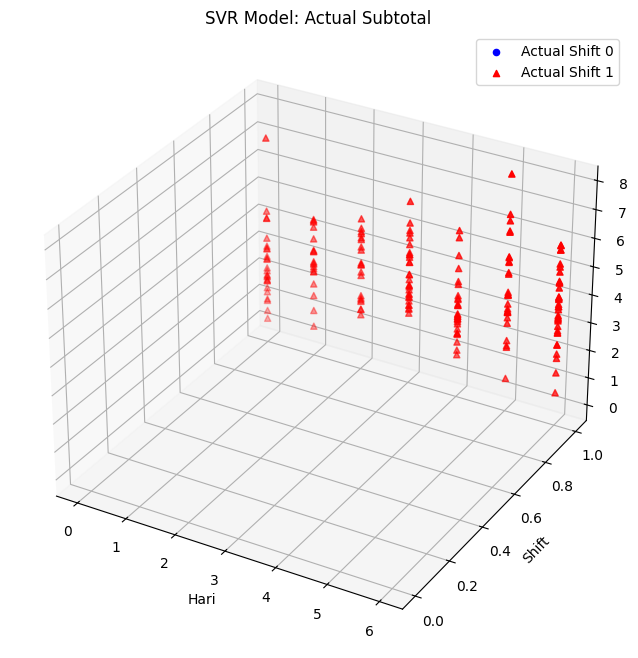

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_valid is a DataFrame containing your validation features
# and y_valid is a Series containing your validation target values

# Create a 3D scatter plot for the actual vs. predicted values
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 'Shift' == 0
ax.scatter(X_valid.loc[X_valid['Shift'] == 0, 'Hari'],
           X_valid.loc[X_valid['Shift'] == 0, 'Shift'],
           y_valid[X_valid['Shift'] == 0],
           label='Actual Shift 0', c='blue', marker='o')

# Scatter plot for 'Shift' == 1
ax.scatter(X_valid.loc[X_valid['Shift'] == 1, 'Hari'],
           X_valid.loc[X_valid['Shift'] == 1, 'Shift'],
           y_valid[X_valid['Shift'] == 1],
           label='Actual Shift 1', c='red', marker='^')

# Add labels and a legend
ax.set_xlabel('Hari')
ax.set_ylabel('Shift')
ax.set_zlabel('Subtotal')
ax.legend()

# Add a title
ax.set_title('SVR Model: Actual Subtotal')

# Show the plot
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5, 1],  # Epsilon in the epsilon-SVR model
}

# Create an SVR model
svr = SVR(kernel='linear')

# Create a GridSearchCV object
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Get the best SVR model
best_svr = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_grid = best_svr.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) for the best model
mse_grid = mean_squared_error(y_valid, y_pred_grid)
print(f'Mean Squared Error (Best Model): {mse_grid}')

# Example usage of the best model for prediction
new_data_grid = np.array([[2,7]])
new_data_scaled_grid = scaler.transform(new_data_grid)
predicted_salary_grid = best_svr.predict(new_data_scaled_grid)
print(f'Predicted Salary (Best Model): {predicted_salary_grid}')

Best Parameters: {'C': 100, 'epsilon': 0.1}
Mean Squared Error (Best Model): 8157121180448.21
Predicted Salary (Best Model): [4686768.87895108]


c:\Users\kleop\Documents\GitHub\learnmlkgl\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
